In [1]:
import pandas as pd

# Dataloading

Data source: https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store

In [2]:
df = pd.read_csv("2019-Dec.csv")

In [3]:
df.dropna(inplace=True)

In [4]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
33,2019-12-01 00:01:47 UTC,view,5732026,1487580011970953351,furniture.bathroom.bath,domix,4.16,509445281,91e9d610-759a-4831-b89a-22f2ab5fbc0f
52,2019-12-01 00:02:42 UTC,view,5746846,2193074740686488401,furniture.bathroom.bath,irisk,52.70,579970581,0b92a801-25d8-4da5-b514-fda26db3faae
90,2019-12-01 00:03:48 UTC,view,5884577,1487580006350586771,appliances.environment.vacuum,max,47.46,499259978,4ee80bbb-17cb-447d-9188-9aa306db3481
112,2019-12-01 00:04:19 UTC,view,5855507,1487580006350586771,appliances.environment.vacuum,max,79.21,499259978,4ee80bbb-17cb-447d-9188-9aa306db3481
138,2019-12-01 00:05:14 UTC,view,5884578,1487580006350586771,appliances.environment.vacuum,max,63.33,499259978,4ee80bbb-17cb-447d-9188-9aa306db3481


In [5]:
df["event_type"].unique()

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

In [6]:
purchase_df = df[df["event_type"]=="purchase"]

In [7]:
df["category_code"].unique()

array(['furniture.bathroom.bath', 'appliances.environment.vacuum',
       'stationery.cartrige', 'apparel.glove', 'accessories.cosmetic_bag',
       'accessories.bag', 'furniture.living_room.cabinet',
       'appliances.personal.hair_cutter',
       'appliances.environment.air_conditioner'], dtype=object)

In [8]:
purchase_df.groupby("category_code").size()

category_code
accessories.bag                             9
accessories.cosmetic_bag                    8
apparel.glove                             542
appliances.environment.air_conditioner      2
appliances.environment.vacuum             533
appliances.personal.hair_cutter             5
furniture.bathroom.bath                   125
furniture.living_room.cabinet              17
stationery.cartrige                       870
dtype: int64

We will consider only the market share of the largest category.

In [9]:
cartridge_df = purchase_df[purchase_df["category_code"]=="stationery.cartrige"]

In [10]:
cartridge_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
50716,2019-12-01 12:31:50 UTC,purchase,5749198,1487580013053083824,stationery.cartrige,italwax,1.98,580143586,f3922290-7fa4-1baa-fe3f-ca74c2eb2864
53352,2019-12-01 12:54:34 UTC,purchase,5749199,1487580013053083824,stationery.cartrige,italwax,1.98,565007305,2a31198f-a493-4133-90fc-e4a057f27dd3
53353,2019-12-01 12:54:34 UTC,purchase,5743974,1487580013053083824,stationery.cartrige,italwax,1.98,565007305,2a31198f-a493-4133-90fc-e4a057f27dd3
61622,2019-12-01 14:12:43 UTC,purchase,5767492,1487580013053083824,stationery.cartrige,italwax,1.98,580289157,ff5aadd2-42f5-4347-9f00-41934e79d69c
61623,2019-12-01 14:12:43 UTC,purchase,5775814,1487580013053083824,stationery.cartrige,italwax,1.98,580289157,ff5aadd2-42f5-4347-9f00-41934e79d69c
...,...,...,...,...,...,...,...,...,...
3494737,2019-12-30 20:27:25 UTC,purchase,5788783,1487580013053083824,stationery.cartrige,italwax,1.98,594898291,7bdae0c9-f1c9-4da6-a467-5a4b59e06dd8
3494738,2019-12-30 20:27:25 UTC,purchase,5820598,1487580013053083824,stationery.cartrige,yoko,2.17,594898291,7bdae0c9-f1c9-4da6-a467-5a4b59e06dd8
3521095,2019-12-31 13:30:39 UTC,purchase,5788781,1487580013053083824,stationery.cartrige,italwax,1.98,590930962,11163a77-6b54-4242-88de-15ecceb72835
3526621,2019-12-31 17:05:26 UTC,purchase,5749199,1487580013053083824,stationery.cartrige,italwax,1.98,594988969,cf485924-6d13-1300-1b1d-28dc9e80e61e


In [11]:
cartridge_df.groupby("brand").size()

brand
depilflax    154
italwax      657
profepil       4
runail        29
yoko          26
dtype: int64

In [12]:
#count the uq brands per session
sess_stats = cartridge_df.groupby(['user_id','user_session']).agg(
    n_brands=('brand','nunique')
).reset_index()

In [13]:
sess_stats

,user_id,user_session,n_brands
0,77415158,c04eab3f-6d86-4e26-814a-39f4020494f3,1
1,164121230,64178f2a-8434-44af-9bdb-92d70f6c023c,1
2,164121230,66165ad1-f107-b84f-1f75-b1244302a1e7,1
3,231183945,34d3e6c9-9307-4b9a-8f60-3f36103f54a8,1
4,232501653,2700869a-f35d-4dae-9f3b-6fb46910ab5a,1
...,...,...,...
423,594030396,2d7350f2-79dc-48b5-b7e9-5e6c5cd1d75b,1
424,594030396,3bf63a5d-eafb-4ada-a1de-d9783654b951,1
425,594301711,7befa68a-72a4-47b8-a3f4-3519a211cfd3,1
426,594898291,7bdae0c9-f1c9-4da6-a467-5a4b59e06dd8,2


In [14]:
sess_summary = sess_stats['n_brands'].value_counts(normalize=True).sort_index() # check how many purchase involved 1, 2... n brands etc.
print("Fraction of sessions by number of distinct brands:\n", sess_summary)

Fraction of sessions by number of distinct brands:
 n_brands
1    0.894860
2    0.095794
3    0.009346
Name: proportion, dtype: float64


Since the proportion is dominated by single-brand purchases, we can drop the user_session feature and assume that each purchase only involved one brand.

In [15]:
df_min = cartridge_df[['event_time','user_id','brand','price']].copy()

In [16]:
df_min

,event_time,user_id,brand,price
50716,2019-12-01 12:31:50 UTC,580143586,italwax,1.98
53352,2019-12-01 12:54:34 UTC,565007305,italwax,1.98
53353,2019-12-01 12:54:34 UTC,565007305,italwax,1.98
61622,2019-12-01 14:12:43 UTC,580289157,italwax,1.98
61623,2019-12-01 14:12:43 UTC,580289157,italwax,1.98
...,...,...,...,...
3494737,2019-12-30 20:27:25 UTC,594898291,italwax,1.98
3494738,2019-12-30 20:27:25 UTC,594898291,yoko,2.17
3521095,2019-12-31 13:30:39 UTC,590930962,italwax,1.98
3526621,2019-12-31 17:05:26 UTC,594988969,italwax,1.98


# Split dataset

In [17]:
def split_train_val_test(df, time_col='event_time', train_frac=0.7, val_frac=0.15, test_frac=0.15, by_time=True, seed=42):
    """
    Split a DataFrame into train, validation, and test sets.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        time_col (str): Column to use for chronological splitting if by_time=True.
        train_frac (float): Fraction for training set.
        val_frac (float): Fraction for validation set.
        test_frac (float): Fraction for test set.
        by_time (bool): Whether to split by time (chronologically) or randomly.
        seed (int): Random seed for reproducibility if by_time=False.
        
    Returns:
        train_df, val_df, test_df (pd.DataFrame)
    """
    assert abs(train_frac + val_frac + test_frac - 1.0) < 1e-6, "Fractions must sum to 1."

    if by_time:
        df_sorted = df.sort_values(time_col)
        n = len(df_sorted)
        train_end = int(train_frac * n)
        val_end = train_end + int(val_frac * n)
        
        train_df = df_sorted.iloc[:train_end].copy()
        val_df = df_sorted.iloc[train_end:val_end].copy()
        test_df = df_sorted.iloc[val_end:].copy()
    else:
        df_shuffled = df.sample(frac=1, random_state=seed).reset_index(drop=True)
        n = len(df_shuffled)
        train_end = int(train_frac * n)
        val_end = train_end + int(val_frac * n)
        
        train_df = df_shuffled.iloc[:train_end].copy()
        val_df = df_shuffled.iloc[train_end:val_end].copy()
        test_df = df_shuffled.iloc[val_end:].copy()
        
    return train_df, val_df, test_df

In [18]:
train_df, val_df, test_df = split_train_val_test(df_min)

In [19]:
train_df.shape

(609, 4)

In [20]:
def prepare_likelihood_data(df, min_frac=0.01, period='W'):
    """
    Prepare user × brand purchase counts for modeling, aggregated by time period.

    Args:
        df (pd.DataFrame): Columns ['event_time','user_id','brand','price']
        min_frac (float): Minimum fraction to keep a brand; rare brands are labeled 'other'
        period (str): 'D' for daily, 'W' for weekly

    Returns:
        user_brand_matrix (np.array) (n_user_periods, n_brands): Each row is a user–period, each column a brand, values are purchase counts.
        user_total_purchases (np.array) (n_user_periods,): Total number of purchases for each user in that period.
        user_ids (np.array) (n_user_periods, Tuple[2]): Each row is a tuple (user_id, period) identifying the user and time period.
        brand_names (list) (n_brands): Names of the brands corresponding to the columns in user_brand_matrix.
    """
    df['event_time'] = pd.to_datetime(df['event_time'], utc=True)
    df['period'] = df['event_time'].dt.to_period(period)

    # merge rare_brands
    brand_counts = df['brand'].value_counts()
    rare_brands = brand_counts[brand_counts / len(df) < min_frac].index
    df['brand'] = df['brand'].where(~df['brand'].isin(rare_brands), 'other')
    
    # aggregate user × period × brand counts
    user_brand_counts = df.groupby(['user_id', 'period', 'brand']).size().unstack(fill_value=0)
    total_purchases_per_user = user_brand_counts.sum(axis=1)
    user_period_ids = user_brand_counts.index.to_numpy()
    brand_names = user_brand_counts.columns.tolist()
    user_brand_matrix = user_brand_counts.values
    user_total_purchases = total_purchases_per_user.values
    
    print("Prepared data shapes:", user_brand_matrix.shape, user_total_purchases.shape)
    
    return user_brand_matrix, user_total_purchases, user_period_ids, brand_names

In [21]:
user_brand_matrix, user_total_purchases, user_period_ids, brand_names = prepare_likelihood_data(train_df)

Prepared data shapes: (289, 5) (289,)


C:\Users\Phu\AppData\Local\Temp\ipykernel_9708\704499980.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['period'] = df['event_time'].dt.to_period(period)


In [22]:
user_brand_matrix, user_total_purchases

(array([[0, 3, 0, 0, 0],
        [0, 5, 0, 0, 0],
        [0, 0, 0, 2, 0],
        ...,
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 5, 0, 0, 0]], dtype=int64),
 array([ 3,  5,  2,  4,  3,  2,  1,  2,  1,  1,  2,  1,  2,  3,  3,  2,  2,
         1,  1,  1,  2,  3,  1,  3,  2,  1,  1,  1,  1,  3,  2,  3,  6,  1,
         1,  2,  3,  2,  1,  3,  2,  1,  3,  2,  1,  1,  3,  3,  1,  1,  1,
         4,  5,  1,  1,  3,  1,  2,  1,  2,  1,  4,  2,  2,  1,  2,  1,  1,
         1,  1,  2,  2,  2,  4,  1,  3,  6,  1, 14,  1,  2,  2,  3,  2,  3,
         1,  3,  1,  5,  2,  1,  2,  1,  1,  1,  1,  1,  4,  2,  4,  3,  3,
         3,  1,  1,  1,  1,  2,  1,  1,  3,  2,  2,  4,  1,  2,  1,  1,  2,
         2,  2,  3,  1,  1,  1,  2,  3,  1,  1,  2,  2,  3,  2,  2,  3,  2,
         2,  1,  1,  2,  1,  1,  4,  1,  2,  2,  2,  2,  1,  1,  1,  1,  1,
         1,  2,  1,  1,  5,  2,  4,  1,  2,  4,  1,  2,  1,  2,  1,  1,  2,
         4,  2,  4,  2,  2,  2,  1,  4,  1,  2,  1,  1,  5,  4

In [23]:
import torch
import pyro
import pyro.distributions as dist

def market_share_model(user_brand_matrix, user_total_purchases):
    device = user_brand_matrix.device
    user_brand_matrix = user_brand_matrix.to(dtype=torch.long, device=device)
    user_total_purchases = user_total_purchases.to(dtype=torch.long, device=device)

    n_users, n_brands = user_brand_matrix.shape

    alpha = pyro.sample(
        "alpha",
        dist.Gamma(torch.ones(n_brands, device=device), torch.ones(n_brands, device=device)).to_event(1)
    )

    with pyro.plate("users", n_users):
        lambda_u = pyro.sample(
            "lambda_user",
            dist.Gamma(2.0 * torch.ones(n_users, device=device),
                       1.0 * torch.ones(n_users, device=device)).to_event(1)
        )
        pyro.sample(
            "Purchase_freq_obs",
            dist.Poisson(lambda_u),
            obs=user_total_purchases.to(dtype=torch.float)
        )

    pyro.sample(
        "Brand_choice_obs",
        dist.DirichletMultinomial(total_count=user_total_purchases, concentration=alpha),
        obs=user_brand_matrix
    )

In [24]:
from pyro.infer import MCMC, NUTS
def run_mcmc(user_brand_matrix_np, user_total_purchases_np,
             num_samples=1000, warmup_steps=400, num_chains=1, device='cuda'):
    user_brand_matrix = torch.as_tensor(user_brand_matrix_np, dtype=torch.float32, device=device)
    user_total_purchases = torch.as_tensor(user_total_purchases_np, dtype=torch.float32, device=device)
    nuts_kernel = NUTS(market_share_model, adapt_step_size=True, target_accept_prob=0.8)
    mcmc = MCMC(nuts_kernel,
                num_samples=num_samples,
                warmup_steps=warmup_steps,
                num_chains=num_chains)
    mcmc.run(user_brand_matrix, user_total_purchases)
    posterior = mcmc.get_samples()
    
    return mcmc, posterior

In [25]:
mcmc, posterior = run_mcmc(user_brand_matrix, user_total_purchases, device="cuda")

Sample: 100%|███████████████████████████████████████| 1400/1400 [08:51,  2.63it/s, step size=7.27e-02, acc. prob=0.864]


In [26]:
test_user_brand_matrix, test_user_total_purchases, user_period_ids, brand_names = prepare_likelihood_data(test_df)

Prepared data shapes: (61, 4) (61,)


C:\Users\Phu\AppData\Local\Temp\ipykernel_9708\704499980.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['period'] = df['event_time'].dt.to_period(period)


In [27]:
from pyro.infer import Predictive
predictive = Predictive(
    market_share_model,
    posterior_samples=mcmc.get_samples(num_samples=1000),
    return_sites=["Brand_choice_obs", "Purchase_freq_obs", "lambda_user"]
)

post_samples = predictive(torch.from_numpy(user_brand_matrix).to('cuda'), torch.from_numpy(user_total_purchases).to('cuda'))

In [31]:
def evaluate_brand_share_predictions(post_samples, observed_brand_matrix, compare_first_k=None):
    """
    Compute predicted brand-share draws and summary metrics suitable for plotting.
    Returns a dict with:
        S: sample_counts, K: truncated_brand_numbers
      - predicted_shares_draws : np.ndarray, shape (S, K)
      - predicted_mean_shares  : np.ndarray, shape (K,)
      - median_pred            : np.ndarray, shape (K,)
      - lower_95               : np.ndarray, shape (K,)
      - upper_95               : np.ndarray, shape (K,)
      - observed_shares        : np.ndarray, shape (K,)
      - euclidean_l2, rmse, mae : floats
    """
    def to_tensor_cpu(x):
        if isinstance(x, torch.Tensor):
            return x.detach().cpu()
        return torch.as_tensor(np.asarray(x))
        
    draws_tensor = to_tensor_cpu(post_samples["Brand_choice_obs"])   # (samples, n_users_model, n_brands_model)
    observed_matrix = to_tensor_cpu(observed_brand_matrix)          # (n_users_obs, n_brands_obs)

    predicted_totals_per_draw = draws_tensor.sum(dim=1).to(dtype=torch.float32)
    totals_per_draw = predicted_totals_per_draw.sum(dim=1, keepdim=True) + 1e-12
    predicted_shares_per_draw = predicted_totals_per_draw / totals_per_draw    

    predicted_shares_draws = predicted_shares_per_draw.numpy()
    predicted_mean_shares = predicted_shares_draws.mean(axis=0)
    median_pred = np.median(predicted_shares_draws, axis=0)
    lower_95 = np.quantile(predicted_shares_draws, 0.025, axis=0)
    upper_95 = np.quantile(predicted_shares_draws, 0.975, axis=0)

    observed_totals = observed_matrix.sum(dim=0).to(dtype=torch.float32).numpy()
    observed_shares_full = observed_totals / (observed_totals.sum() + 1e-12)
    
    if compare_first_k is not None:
        K = int(compare_first_k)
    else:
        K = min(predicted_mean_shares.shape[0], observed_shares_full.shape[0])
        
    predicted_shares_draws = predicted_shares_draws[:, :K]
    predicted_mean_shares = predicted_mean_shares[:K]
    median_pred = median_pred[:K]
    lower_95 = lower_95[:K]
    upper_95 = upper_95[:K]
    observed_shares = observed_shares_full[:K]
    
    diff = predicted_mean_shares - observed_shares
    euclidean_l2 = float(torch.linalg.norm(torch.from_numpy(diff)).item())
    rmse = float(np.sqrt(np.mean(diff**2)))
    mae = float(np.mean(np.abs(diff)))

    return {
        "predicted_shares_draws": predicted_shares_draws,   # (S, K)
        "predicted_mean_shares": predicted_mean_shares,     # (K,)
        "median_pred": median_pred,                         # (K,)
        "lower_95": lower_95,                               # (K,)
        "upper_95": upper_95,                               # (K,)
        "observed_shares": observed_shares,                 # (K,)
        "euclidean_l2": euclidean_l2,
        "rmse": rmse,
        "mae": mae
    }

# Plotting

In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def plot_brand_share_posterior(sim_brand_share, obs_brand_share, brand_names=None):
    if isinstance(sim_brand_share, torch.Tensor):
        posterior_samples = sim_brand_share.detach().cpu().numpy()
    else:
        posterior_samples = np.asarray(sim_brand_share)
        
    n_brands = len(obs_brand_share)
    posterior_samples = posterior_samples[:, :n_brands]
    observed_shares = np.asarray(obs_brand_share)

    brand_indices = np.arange(n_brands)

    if brand_names is None:
        labels = [f'B{k}' for k in brand_indices]
    else:
        if len(brand_names) != n_brands:
            raise ValueError("Length of brand_names must match number of brands")
        labels = brand_names
        
    median_pred = np.median(posterior_samples, axis=0)
    lower_95 = np.quantile(posterior_samples, 0.025, axis=0)
    upper_95 = np.quantile(posterior_samples, 0.975, axis=0)

    print("Posterior predictive 95% credible intervals per brand:")
    for k in range(n_brands):
        print(f"{labels[k]}: median={median_pred[k]:.3f}, 95% CI=({lower_95[k]:.3f}, {upper_95[k]:.3f}), obs={observed_shares[k]:.3f}")

    fig, ax = plt.subplots(figsize=(min(12, n_brands*0.6), 5))

    violin_parts = ax.violinplot(posterior_samples, positions=brand_indices,
                                 showmeans=False, showmedians=True, showextrema=True)
    for body in violin_parts['bodies']:
        body.set_facecolor('#1f77b4')
        body.set_edgecolor('black')
        body.set_alpha(0.7)

    ax.vlines(brand_indices, lower_95, upper_95, color='black', lw=2, alpha=0.8, label="95% CI")

    ax.scatter(brand_indices, observed_shares, color='red', zorder=5, marker='D', s=40)
    legend_handles = [
        Patch(facecolor='#1f77b4', edgecolor='black', alpha=0.7, label='Posterior predictive'),
        Line2D([0], [0], color='black', lw=2, label='Median (posterior)'),
        Line2D([0], [0], color='black', lw=2, alpha=0.8, label='95% CI'),
        Line2D([0], [0], marker='D', color='w', markerfacecolor='red', markersize=8, label='Observed')
    ]
    ax.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

    ax.set_xticks(brand_indices)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_ylabel('Brand share')
    ax.set_title('Posterior predictive distribution of brand share vs observed')
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

RMSE: 0.03170614317059517 MAE: 0.027039755135774612
Posterior predictive 95% credible intervals per brand:
depilflax: median=0.169, 95% CI=(0.169, 0.169), obs=0.145
italwax: median=0.775, 95% CI=(0.775, 0.775), obs=0.756
runail: median=0.005, 95% CI=(0.005, 0.005), obs=0.015
yoko: median=0.030, 95% CI=(0.030, 0.030), obs=0.084


C:\Users\Phu\AppData\Local\Temp\ipykernel_9708\504090413.py:57: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


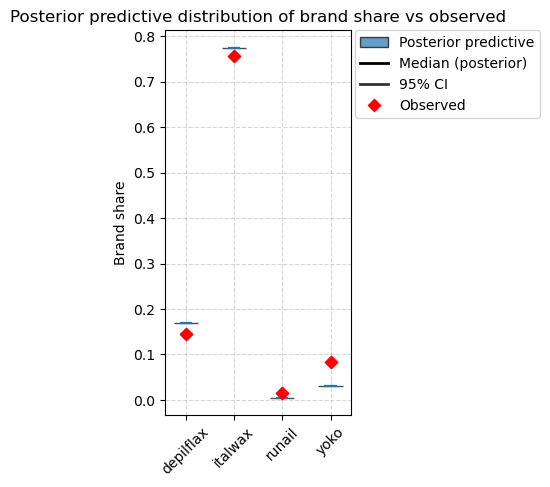

In [30]:
results = evaluate_brand_share_predictions(post_samples, test_user_brand_matrix, compare_first_k=4)

print("RMSE:", results["rmse"], "MAE:", results["mae"])

plot_brand_share_posterior(results["predicted_shares_draws"], results["observed_shares"], brand_names=brand_names[:4])